# Credit Data Analysis

**The analysis includes:**

**Coefficients of Independent Variables**: Identifying which variables most strongly influence credit risk.<br>
**Income & Beta Value Comparison**: Comparing credit risk coefficients across different regions and understanding how income levels interact with credit balances.<br>
**Interaction Effects**: Examining how the interaction between various credit balance determinants influences the credit risk.<br>
**Risk Score Calculation**: Creating a new column in the dataset that calculates a risk score, and categorizing these into risk levels for better risk assessment.<br>

The findings offer a foundation for further research into credit risk analysis, providing valuable insights into how different factors contribute to credit behavior.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('./ALL CSV FILES - 2nd Edition/Credit.csv')
# There is no specific meaning to that column
df = df.drop('Own', axis=1)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,West,580
3,148.924,9504,681,3,36,11,No,No,West,964
4,55.882,4897,357,2,68,16,No,Yes,South,331


That's the preview of dataframe and since it got qualatative variables we need to do some one-hot coding to the dataframe.

In [ ]:
# Seperate predictors and output

X = df.drop('Balance',axis=1)
y = df['Balance']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Seperated the data into 2 categories for train model and test model.

In [ ]:
# Separate quantitative data (numerical columns)
num_features = df.select_dtypes(include=['number'])
num_features = num_features.drop('Balance', axis=1)

num_features.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
dtype: object

## One-hot encoding to the qualtative data

In [ ]:
#getting dummie var as one-hot encoding

X_train_dum = pd.get_dummies(X_train)
X_test_dum = pd.get_dummies(X_test)

X_train_dum.head()

,Income,Limit,Rating,Cards,Age,Education,Student_No,Student_Yes,Married_No,Married_Yes,Region_East,Region_South,Region_West
3,148.924,9504,681,3,36,11,True,False,True,False,False,False,True
18,49.570,6384,448,1,28,9,True,False,False,True,False,False,True
202,21.038,1448,145,2,58,13,True,False,False,True,False,True,False
250,10.363,2430,191,2,47,18,True,False,False,True,False,False,True
274,30.550,5869,439,5,81,9,True,False,True,False,True,False,False


In [ ]:
model_2 = LinearRegression().fit(X_train_dum,y_train)

train_score_m2 = model_2.score(X_train_dum, y_train)
test_score_m2 = model_2.score(X_test_dum, y_test)

#R^2 score for model 2
print('Train R2:', train_score_m2)
print('Test R2:', test_score_m2)

Train R2: 0.9550516628177907
Test R2: 0.9522817944465947


*As we can see, the **R-squared** value for the test score improved from **0.82** to **0.95**. This improvement is because we incorporated both quantitative and qualitative data into training the model.*

## Coefficients of independent variables and dependent variables

In [ ]:
coefs = pd.DataFrame(model_2.coef_, index=X_train_dum.columns, columns=['Beta Value'])

coefs

,Beta Value
Income,-7.528121
Limit,0.198293
Rating,0.964316
Cards,19.207483
Age,-0.606515
Education,-1.000247
Student_No,-208.752599
Student_Yes,208.752599
Married_No,3.015332
Married_Yes,-3.015332


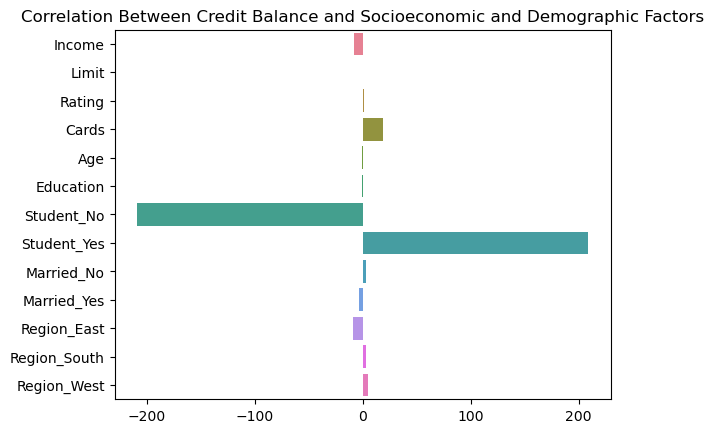

In [ ]:
sns.barplot(data=coefs.T, orient='h').set(title='Correlation Between Credit Balance and Socioeconomic and Demographic Factors');

**Positive coefficients**: The feature increases the credit balance. Limit, Rating, Cards, Own_No, Student_Yes, Married_No, Region_South, Region_West: Increase the credit balance.<br>
**Negative coefficients**: The feature decreases the credit balance. Income, Age, Education, Own_Yes, Student_No, Married_Yes, Region_East: Decrease the credit balance.

## Income & Beta Value Comparison Between Regions

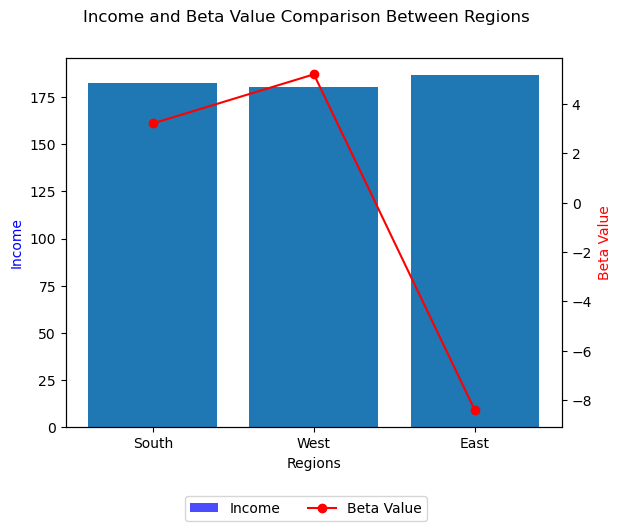

In [ ]:
# Create a figure and twin axes
fig, ax1 = plt.subplots()

# Bar plot on primary y-axis
ax1.bar(df['Region'], df['Income'], label='Income')
ax1.set_xlabel('Regions')
ax1.set_ylabel('Income', color='blue')


# Create a secondary y-axis for the coefficients
ax2 = ax1.twinx()
ax2.plot(regions, coefs.loc[['Region_East', 'Region_West', 'Region_South']], color='red', marker='o', label='Beta Value')
ax2.set_ylabel('Beta Value', color='red')
ax2.tick_params(axis='y')

# Title and legend
fig.suptitle('Income and Beta Value Comparison Between Regions')
# Add a single legend outside the subplots

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)


# Show the plot
plt.show()

*As income gain, credit balance decline and we can see that east region has greatest income of all 3 regions and it has the lowest credit value relation. Meanwhile West has the biggest credit value becasue it's income is the lowest of all 3.*

## Interaction effect analysis: Credit Balance Determinants

In [ ]:
income_stud_y = ['Income', 'Student_Yes']
model_3 = LinearRegression().fit(X_train_dum[income_stud_y], y_train)

beta_0 = model_3.intercept_
beta_1 = model_3.coef_[income_stud_y.index('Income')]
beta_2 = model_3.coef_[income_stud_y.index('Student_Yes')]

sub_coefs = pd.DataFrame([beta_0,beta_1,beta_2], index=['Intercept']+income_stud_y, columns=['Beta Value'])

sub_coefs

,Beta Value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


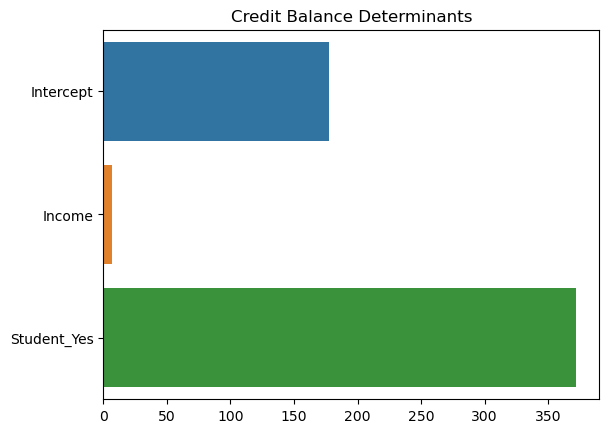

In [ ]:
# Visualize crude measure of feature importance.
sns.barplot(data=sub_coefs.T, orient='h').set(title='Credit Balance Determinants');

**Baseline (Intercept)**: The default Credit Balance is 177.66 units for non-students with zero income.<br>
**Income Effect**: Each unit increase in Income raises Credit Balance by 6.77 units.<br>
**Student Effect**: Students have a significantly higher Credit Balance (371.90 units more) than non-students, regardless of income.<br>
**Insights: Higher income correlates with higher Credit Balances, and students show notably greater reliance on credit compared to non-students.**

## Credit Risk Analysis

In this analysis, we will examine the high-risk and low-risk groups based on credit predictors. To achieve this, we will define specific risk criteria (e.g., Income: Lower income may indicate higher risk; Limit: Lower credit limits might correlate with higher risk). Using these criteria, a risk score will be calculated for each observation. Finally, the risk scores will be categorized into predefined risk levels to identify and classify the groups.

*p.s : We will only focus on quantative data for credit risk analysis*

In [ ]:
# Normalize numerical columns
scaler = MinMaxScaler()
df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']] = scaler.fit_transform(
    df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
)

# Compute a risk score (Weights are set manually)
df['Risk_Score'] = (
    0.3 * df['Income'] +
    0.3 * df['Rating'] -
    0.2 * df['Limit'] +
    0.1 * df['Cards'] -
    0.05 * df['Age'] +
    0.05 * df['Education']
)

# Classify risk
df['Risk_Level'] = pd.qcut(df['Risk_Score'], q=3, labels=['High', 'Medium', 'Low'])


print(df[['Risk_Score', 'Risk_Level']])

     Risk_Score Risk_Level
0      0.054870       High
1      0.224744        Low
2      0.232682        Low
3      0.338112        Low
4      0.123828     Medium
..          ...        ...
395    0.071146       High
396    0.089938     Medium
397    0.151020        Low
398    0.067083       High
399    0.080688     Medium

[400 rows x 2 columns]


In [ ]:
inc_risksc = df[['Income','Risk_Score']]

inc_risksc

,Income,Risk_Score
0,0.025737,0.054870
1,0.542722,0.224744
2,0.534598,0.232682
3,0.786079,0.338112
4,0.258271,0.123828
...,...,...
395,0.009882,0.071146
396,0.017075,0.089938
397,0.269560,0.151020
398,0.155287,0.067083


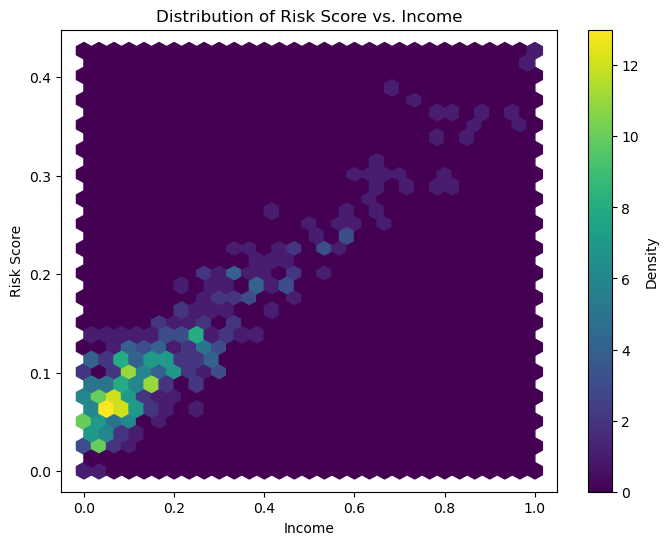

In [ ]:
# Plot a hexbin plot
plt.figure(figsize=(8, 6))
plt.hexbin(df['Income'], df['Risk_Score'], gridsize=30)

# Add color bar to show the density of points
plt.colorbar(label='Density')

# Add titles and labels
plt.title('Distribution of Risk Score vs. Income')
plt.xlabel('Income')
plt.ylabel('Risk Score')

# Show the plot
plt.show()

In [ ]:
# Calculate the correlation coefficient between Income and Risk_Score
correlation = df['Income'].corr(df['Risk_Score'])
print(f"Correlation between Income and Risk Score: {correlation}")

Correlation between Income and Risk Score: 0.9360881201308509


*A correlation of 0.9 between Income and Risk_Score indicates a strong positive correlation. This means that as Income increases, Risk_Score also tends to increase (or vice versa).*

## Conclusion

In this project, I performed an analysis focusing on the relationship between independent variables and the dependent variable. I examined the coefficients of independent variables and their impact on the dependent variable, specifically analyzing income and the beta value comparison between different regions. Additionally, explored the interaction effect between various credit balance determinants and credit risk. The findings revealed that the independent variables with the largest coefficients had the most significant impact on the dependent variable, highlighting the strong relationships between credit coefficients and regional income levels.And also observed an interesting interaction between income and student-related factors, further enhancing our understanding of credit dynamics. Lastly, I created new columns in the dataset to calculate risk scores and categorize risk levels, allowing for a more detailed assessment of credit risk.

This analysis provides valuable insights into credit risk, offering a foundation for further investigations into how various factors influence credit behavior across different regions. Future work could focus on refining the model by incorporating additional variables or exploring non-linear relationships to improve predictive accuracy.